<center><h1>Assignment 3</h1></center>

## Problem Statement
Build the Image classification model by dividing the model into following 4 stages:
1. Loading and preprocessing the image data
2. Defining the model’s architecture
3. Training the model
4. Estimating the model’s performance

## Notebook Details
1. Author : Varad Girish Mashalkar
2. Branch : Information Technology
3. Division : BE 11
4. Batch : Q11
5. Roll Number : 43335
6. Course : Laboratory Practice 4 (Deep Learning)

## Implementation Details
1. Python version : 3.7.0
2. Tensorflow version : 2.7.0 (Compatible with CUDA11.5 and cuDNN8.6.0)

## Imports
1. numpy
2. tensorflow
3. matplotlib
4. seaborn
5. LabelBinarizer and classification_report from sklearn.preprocessing and sklearn.metrics respectively

## Fashion MNIST dataset
1. Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.
2. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. 

# 1. Importing required libraries

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
sns.set()
%matplotlib inline

In [2]:
# Checking import version of tensorflow
tf.__version__

'2.7.0'

# 2. Fetching the dataset

In [5]:
dataset = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 4s 1us/step


In [6]:
(train_images, train_labels), (test_images, test_labels) = dataset

In [9]:
print("Training data inputs shape  : ", train_images.shape)
print("Training data targets shape : ", train_labels.shape)
print("Testing data inputs shape   : ", test_images.shape)
print("Testing data targets shape  : ", test_labels.shape)

Training data inputs shape  :  (60000, 28, 28)
Training data targets shape :  (60000,)
Testing data inputs shape   :  (10000, 28, 28)
Testing data targets shape  :  (10000,)


# 3. Data analysis

### a) Checking maximum and minimum values in dataset

In [11]:
max_val = max([np.max(train_images), np.max(train_labels)])
min_val = max([np.min(train_images), np.min(train_labels)])
print("Maximum value : ", max_val)
print("Minimum value : ", min_val)

Maximum value :  255
Minimum value :  0


### b) Class count in training and testing sets

In [13]:
train_unique_targets, train_targets_frequency = np.unique(train_labels, return_counts=True)
test_unique_targets, test_targets_frequency = np.unique(test_labels, return_counts=True)

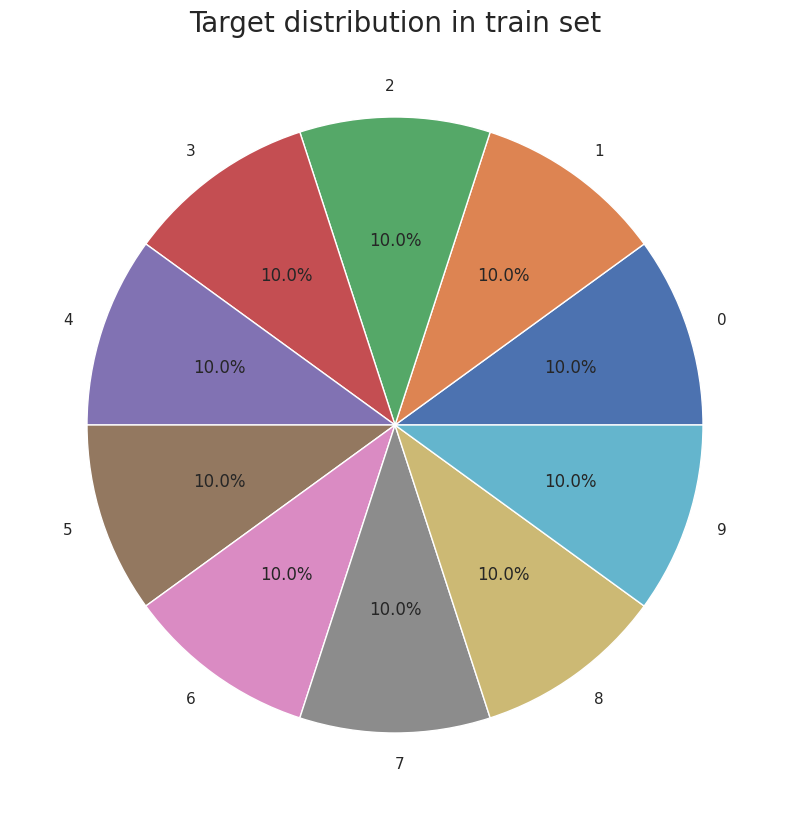

In [14]:
# Plotting pie chart for the distribution of targets in train and test sets
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.pie(
    x=train_targets_frequency,
    labels=train_unique_targets,
    autopct='%1.1f%%'
)
plt.title("Target distribution in train set", fontsize=20)
plt.show()

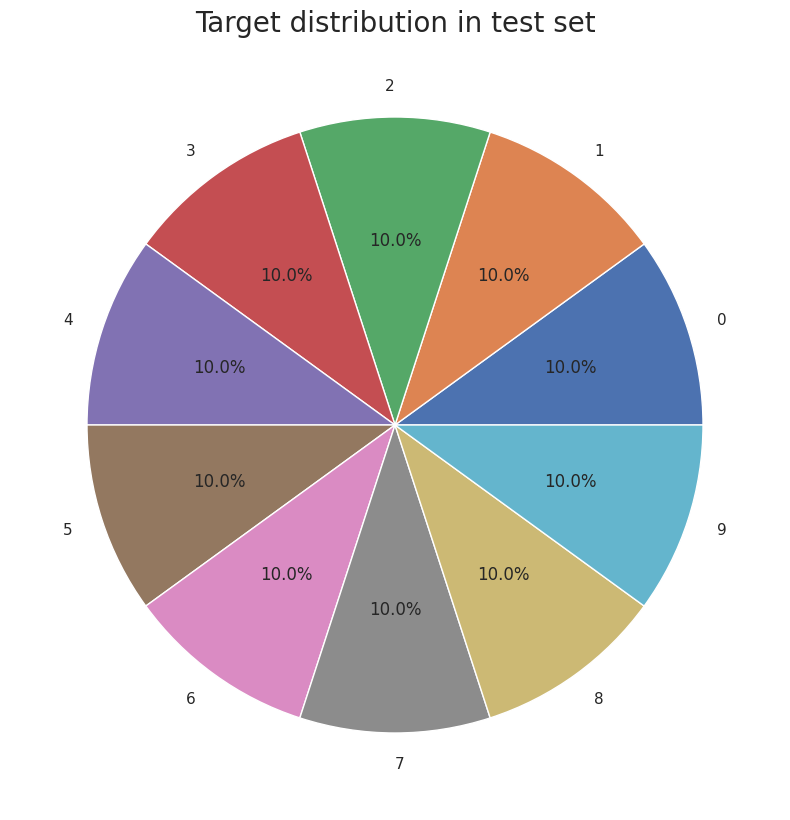

In [15]:
# Plotting pie chart for the distribution of targets in train and test sets
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.pie(
    x=test_targets_frequency,
    labels=train_unique_targets,
    autopct='%1.1f%%'
)
plt.title("Target distribution in test set", fontsize=20)
plt.show()

# Observations :

1. Maximum pixel value : 255
2. Minimum pixel value : 0
3. Number of target classes : 10 [0-9]
4. Frequency of classes in training and testing targets : 10%
5. The dataset is balanced for the number of samples for each class in training and testing dataset
6. Dataset needs to be scaled for better convergence of SGD

# 4. Viewing random data points in dataset 

In [19]:
idx = 5

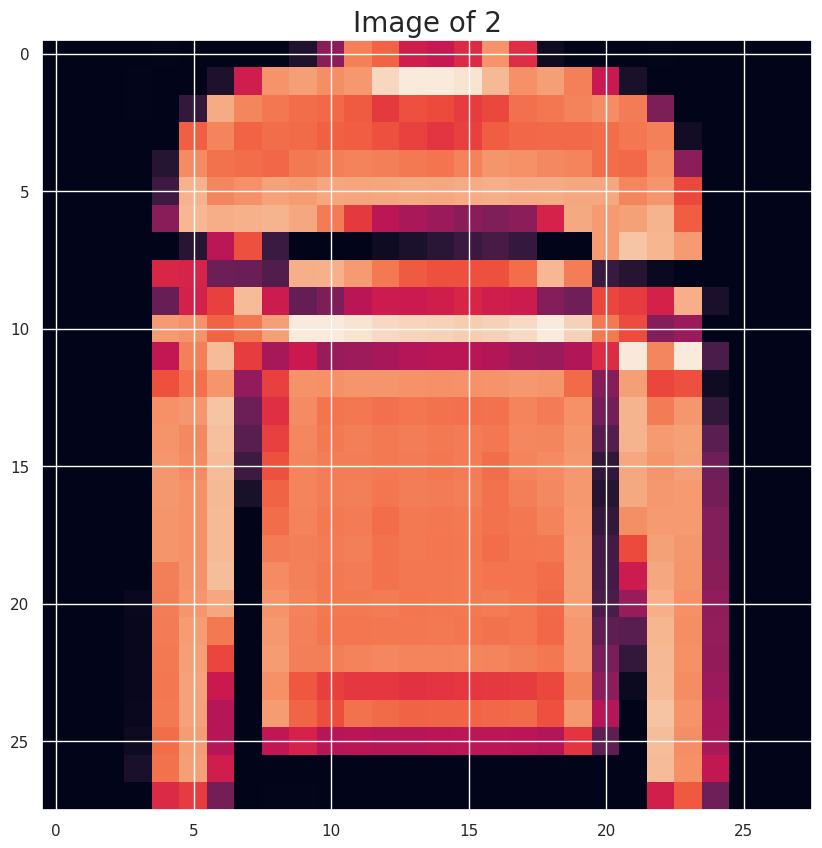

In [20]:
frame = np.float64(train_images[idx])
target = train_labels[idx]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.imshow(frame)
plt.title("Image of {}".format(target), fontsize=20)
plt.show()

# 5. Data preprocessing

## a) Feature scaling

In [28]:
# Scaling train and test inputs for a range of 0 to 1 by dividing by 255 (scalar)
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [26]:
# Confirming maximum and minimum value in dataset
max_val = max([np.max(train_images_scaled), np.max(train_images_scaled)])
min_val = max([np.min(test_images_scaled), np.min(test_images_scaled)])
print("Maximum value : ", max_val)
print("Minimum value : ", min_val)

Maximum value :  1.0
Minimum value :  0.0


## b) Reshaping image arrays to expand dimension

In [29]:
train_images_reshaped = np.expand_dims(train_images_scaled, axis=3)
test_images_reshaped = np.expand_dims(test_images_scaled, axis=3)

In [30]:
print("Reshaped training images : ", train_images_reshaped.shape)
print("Reshaped testing images  : ", test_images_reshaped.shape)

Reshaped training images :  (60000, 28, 28, 1)
Reshaped testing images  :  (10000, 28, 28, 1)


# 6. Model Definition

In [36]:
# Defining constants
EPOCHS = 20
BATCH_SIZE = 64

In [31]:
# Defining model Structure
model = tf.keras.models.Sequential([
    tfl.Conv2D(filters=16, kernel_size=(3,3), input_shape=[28,28,1], padding="same", activation='relu'),    
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=120, activation='relu'),    
    tf.keras.layers.Dense(10, activation='softmax')
])

2022-10-18 14:02:44.097131: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 14:02:45.180595: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 14:02:45.180969: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 14:02:45.204855: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [34]:
# Compiling model 
model.compile(
    optimizer='sgd',                          # Stochastic Gradient Descent Optimizer
    metrics=['accuracy'],                     # Track accuracy while training
    loss='sparse_categorical_crossentropy'    # Defining loss function
)

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 120)               1

# 7. Model Training

In [37]:
history = model.fit(
    x=train_images_reshaped, 
    y=train_labels,   
    batch_size=BATCH_SIZE,
    epochs=EPOCHS
)

2022-10-18 14:03:35.235399: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-10-18 14:03:35.634471: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/20


2022-10-18 14:03:46.429937: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


938/938 [==============================] - 32s 3ms/step - loss: 0.9440 - accuracy: 0.6664
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.5735 - accuracy: 0.7925
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4913 - accuracy: 0.8218
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4428 - accuracy: 0.8418
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4106 - accuracy: 0.8538
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3880 - accuracy: 0.8622
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3704 - accuracy: 0.8685
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3551 - accuracy: 0.8738
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3417 - accuracy: 0.8781
Epoch 10/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3304 - accuracy: 0.8813
Epoch 11/

# 8. Model testing

In [39]:
results = model.evaluate(test_images_reshaped, test_labels, batch_size=BATCH_SIZE)

2022-10-18 14:05:29.496001: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


  1/157 [..............................] - ETA: 20s - loss: 0.3371 - accuracy: 0.8594

2022-10-18 14:05:30.298122: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


157/157 [==============================] - 1s 3ms/step - loss: 0.2983 - accuracy: 0.8957


In [40]:
test_loss, test_accuracy = results

In [41]:
print("Testing accuracy : ", test_accuracy*100, "%")

Testing accuracy :  89.56999778747559 %


# 9. Plotting training loss and accuracy over epochs

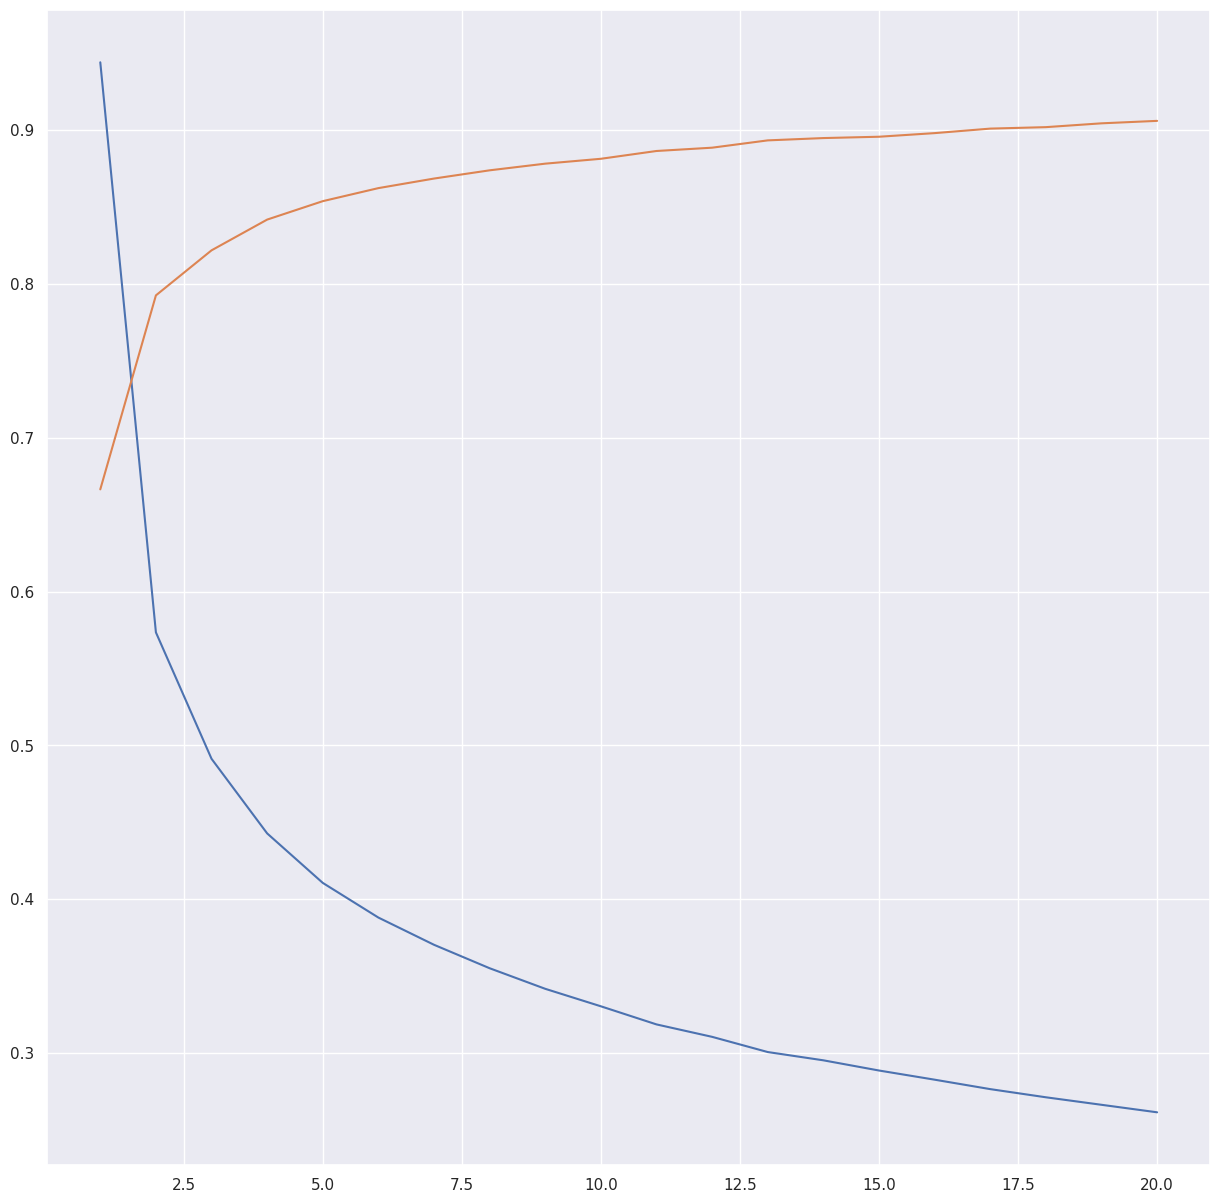

In [43]:
epochs = np.arange(1, 21)
training_loss = history.history["loss"]
training_accuracy = history.history["accuracy"]
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.plot(epochs, training_loss,)
ax.plot(epochs, training_accuracy)
plt.show()

# 10. Results

1. Training data final accuracy : 90.60%
2. Testing accuracy : 89.57%

# 11. Classification report

In [51]:
predictions = model.predict(test_images_reshaped)

In [52]:
predictions_decoded = [np.argmax(i) for i in predictions]

In [54]:
report = classification_report(test_labels, predictions_decoded)

In [55]:
print(report)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.79      0.83      1000
           3       0.85      0.94      0.89      1000
           4       0.81      0.84      0.83      1000
           5       0.98      0.97      0.97      1000
           6       0.75      0.69      0.72      1000
           7       0.94      0.95      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



<center><h1>End of Notebook</h1></center>